In [5]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
from datetime import datetime, timedelta, timezone
import bz2
import json
import collections
from pprint import PrettyPrinter

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

from intervaltree import IntervalTree, Interval
from iso8601 import parse_date

from satbazaar import db


pprint = PrettyPrinter().pprint


In [7]:
#%%time
# NBVAL_IGNORE_OUTPUT

# script 'get-observations.py' generates this file
observations = db.load_observations()
satellites = db.load_satellites()

In [8]:
# construct histogram of observation count per satellite
# find earliest observation per sat for normalization
norad_hist = collections.defaultdict(int)

now = datetime.now(timezone.utc)
def recent():
    return now

norad_first = collections.defaultdict(recent)

for o in observations.values():
    norad = o['norad_cat_id']
    start = parse_date(o['start'])
    
    norad_hist[o['norad_cat_id']] += 1
    if start < norad_first[norad]:
        norad_first[norad] = start

In [9]:
# order dict by value
norad_hist = collections.OrderedDict(sorted(norad_hist.items(), key=lambda t: t[1], reverse=True))

# add known sats with no observations
for sat in satellites.values():
    norad = sat['norad_cat_id']
    if norad not in norad_hist:
        norad_hist[norad] = 0

In [10]:
norads, counts = zip(*norad_hist.items())

norad2name = {}
for norad, sat in satellites.items():
    norad2name[norad] = sat['name']

names = []
for i in sorted(norads):
    try:
        name = norad2name[i]
    except KeyError:
        print(i, 'missing')
        name = 'Unknown'
    names.append(name)


39381 missing
39436 missing
40897 missing
40948 missing
40949 missing
41474 missing
41477 missing
41478 missing
41895 missing
41909 missing
41931 missing
41934 missing
42702 missing
42737 missing
42770 missing
43656 missing
43721 missing
43722 missing
43738 missing
43743 missing
43758 missing
43768 missing
43770 missing
43772 missing
43773 missing
43780 missing
43782 missing
43784 missing
43786 missing
43787 missing
43790 missing
43792 missing
43793 missing
43798 missing
43803 missing
43804 missing
43805 missing
43814 missing
43855 missing
43856 missing
43879 missing
43880 missing
43881 missing
43908 missing
43933 missing
43937 missing
44030 missing
44045 missing
44046 missing
99901 missing
99906 missing
99913 missing
99914 missing
99915 missing
99917 missing
99921 missing
99926 missing
99930 missing
99940 missing
99943 missing
99944 missing
99952 missing
99962 missing
99963 missing
99970 missing
99974 missing
99975 missing
99981 missing


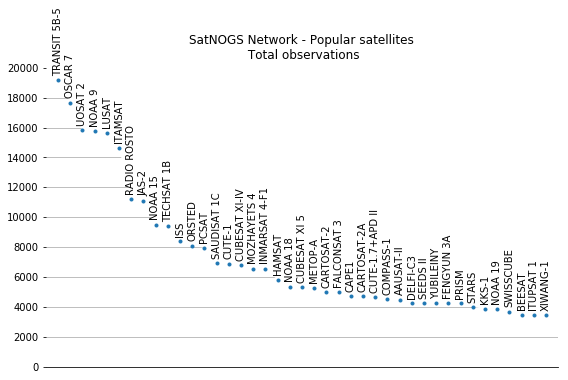

In [16]:
num_sats = 41
offset = 300

fig, ax = plt.subplots(figsize=(8,5))

x = list(range(len(names)))
lines = ax.plot(x[:num_sats], counts[:num_sats], '.')




# add satellite name data labels
for i, name, count in zip(x[:num_sats],
                          names[:num_sats],
                          counts[:num_sats]):
    ax.text(i, count+offset, name, rotation='vertical', ha='center', va='bottom')


# cleanup x axis junk
ax.set_xlim((-1, num_sats))
ax.set_xticks([])

# cleanup y axis
ymax = max(counts[:num_sats]) + 1000
ax.set_yticks(range(0, ymax, 2000))
ax.set_ylim((0, ymax))

# turn off borders
for pos in ('top', 'left', 'right'):
    ax.spines[pos].set_visible(False)

# construct a patch for clipping the gridlines
xy = list(zip(x, counts))
xy.insert(0, (-1, counts[0]))
xy.insert(0, (-1, 0))
xy.append((num_sats, 0))
path = mpl.path.Path(xy)
patch = mpl.patches.PathPatch(path, facecolor='none', edgecolor='none')

# add patch (necessary!) then clip grid lines
ax.add_patch(patch)
ax.grid(axis='y', clip_path=patch)

ax.set_title('SatNOGS Network - Popular satellites\n Total observations')

fig.tight_layout()
#fig.savefig('popular-sats-all.png', dpi=100)


In [17]:
# normalize to average obs/day
for norad in norad_hist.keys():
    start = norad_first[norad]
    days = (now - start).total_seconds() / (60*60*24)
    if days != 0:
        norad_hist[norad] /= days
    else:
        norad_hist[norad] = 0
    
norad_hist = collections.OrderedDict(sorted(norad_hist.items(), key=lambda t: t[1], reverse=True))

norads, counts = zip(*norad_hist.items())

norad2name = {}
for norad, sat in satellites.items():
    norad2name[norad] = sat['name']

names = []
for i in norads:
    try:
        name = norad2name[i]
    except KeyError:
        print(i, 'missing')
        name = 'Unknown'
    names.append(name)


44045 missing
43792 missing
43780 missing
43770 missing
44046 missing
43937 missing
43814 missing
43786 missing
43803 missing
43908 missing
43879 missing
43880 missing
43855 missing
44030 missing
43793 missing
43743 missing
43768 missing
43656 missing
43721 missing
43881 missing
43787 missing
43933 missing
43738 missing
43784 missing
43758 missing
43804 missing
43805 missing
43772 missing
99914 missing
99913 missing
43790 missing
99981 missing
99963 missing
99975 missing
99901 missing
99940 missing
43856 missing
99906 missing
42737 missing
43773 missing
99943 missing
42702 missing
99921 missing
43722 missing
99944 missing
99962 missing
43798 missing
99930 missing
41895 missing
99926 missing
99917 missing
99915 missing
99952 missing
43782 missing
39436 missing
41474 missing
42770 missing
41478 missing
41931 missing
99974 missing
41934 missing
41909 missing
41477 missing
99970 missing
40949 missing
39381 missing
40948 missing
40897 missing


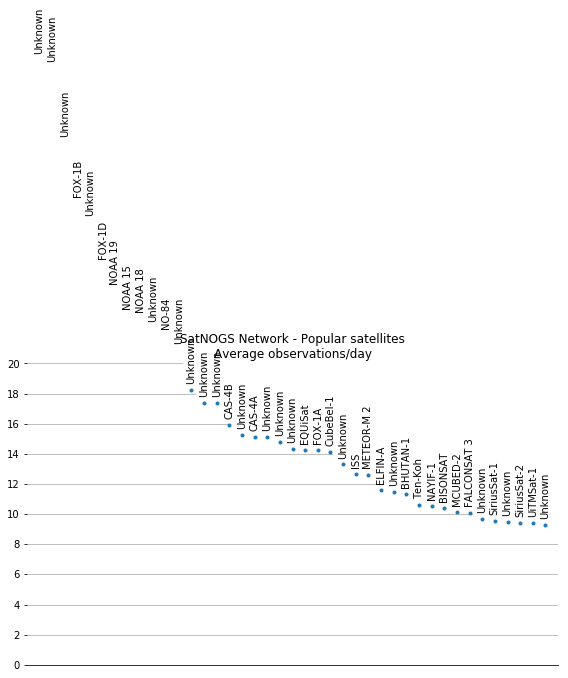

In [18]:
num_sats = 41
offset = 0.4

fig, ax = plt.subplots(figsize=(8,5))

x = list(range(len(names)))
lines = ax.plot(x[:num_sats], counts[:num_sats], '.')




# add satellite name data labels
for i, name, count in zip(x[:num_sats],
                          names[:num_sats],
                          counts[:num_sats]):
    ax.text(i, count+offset, name, rotation='vertical', ha='center', va='bottom')


# cleanup x axis junk
ax.set_xlim((-1, num_sats))
ax.set_xticks([])

# cleanup y axis
ax.set_yticks(range(0, 21, 2))
ax.set_ylim((0, 20))

# turn off borders
for pos in ('top', 'left', 'right'):
    ax.spines[pos].set_visible(False)

# construct a patch for clipping the gridlines
xy = list(zip(x, counts))
xy.insert(0, (-1, counts[0]))
xy.insert(0, (-1, 0))
xy.append((num_sats, 0))
path = mpl.path.Path(xy)
patch = mpl.patches.PathPatch(path, facecolor='none', edgecolor='none')

# add patch (necessary!) then clip grid lines
ax.add_patch(patch)
ax.grid(axis='y', clip_path=patch)

ax.set_title('SatNOGS Network - Popular satellites\nAverage observations/day')

fig.tight_layout()
#fig.savefig('popular-sats-avg.png', dpi=100)
